<a href="https://colab.research.google.com/github/CristianLLDev/talentotech/blob/main/ejercicio_21_sept_Regresion_simple_y_multiple_de_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

regersion lineal Simple Y multiple

In [50]:
import pandas as pd
import sklearn
import seaborn as sns


In [51]:
df_coches = pd.read_csv("venta_de_coches.csv")

df_coches

,Longitud del coche,Ancho del coche,Peso del coche,Tamaño del motor,Tipo de combustible,Precio
0,451,195,827,1.644854,Electric,38
1,492,194,907,2.649960,Electric,45
2,414,197,843,3.043056,Diesel,20
3,471,197,1139,2.388002,Electric,43
4,460,197,1085,2.324126,Gasoline,24
...,...,...,...,...,...,...
95,484,199,1159,2.989482,Gasoline,49
96,479,194,928,3.225013,Diesel,36
97,481,190,1066,1.844988,Electric,36
98,452,175,950,1.938957,Diesel,49


In [61]:
print(df_coches.dtypes)

Longitud del coche       int64
Ancho del coche          int64
Peso del coche           int64
Tamaño del motor       float64
Tipo de combustible     object
Precio                   int64
dtype: object


Filtrar columnas numericas

In [62]:
numerical_df = df_coches.select_dtypes(include=['number'])

# Generar la matriz de correlación
corr_matrix = numerical_df.corr()

# Mostrar la matriz
print(corr_matrix)

                    Longitud del coche  Ancho del coche  Peso del coche  \
Longitud del coche            1.000000         0.061729        0.030276   
Ancho del coche               0.061729         1.000000        0.097780   
Peso del coche                0.030276         0.097780        1.000000   
Tamaño del motor             -0.113336        -0.001244       -0.141589   
Precio                       -0.016115         0.014843        0.120488   

                    Tamaño del motor    Precio  
Longitud del coche         -0.113336 -0.016115  
Ancho del coche            -0.001244  0.014843  
Peso del coche             -0.141589  0.120488  
Tamaño del motor            1.000000  0.170641  
Precio                      0.170641  1.000000  


In [63]:
# Convertir una columna específica a numérica
df_coches['Tipo de Combustible'] = pd.to_numeric(df_coches['Tipo de combustible'], errors='coerce')

In [52]:
df_coches.info
df_coches.describe()

,Longitud del coche,Ancho del coche,Peso del coche,Tamaño del motor,Precio
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,450.540000,183.780000,1015.600000,2.380756,34.530000
std,29.425963,9.374994,100.947931,0.719801,9.194261
min,401.000000,170.000000,801.000000,1.012654,20.000000
25%,422.500000,176.000000,928.750000,1.778259,26.750000
50%,453.000000,182.000000,1009.500000,2.526795,36.000000
75%,475.500000,193.000000,1106.250000,3.002654,43.000000
max,499.000000,199.000000,1194.000000,3.475135,49.000000


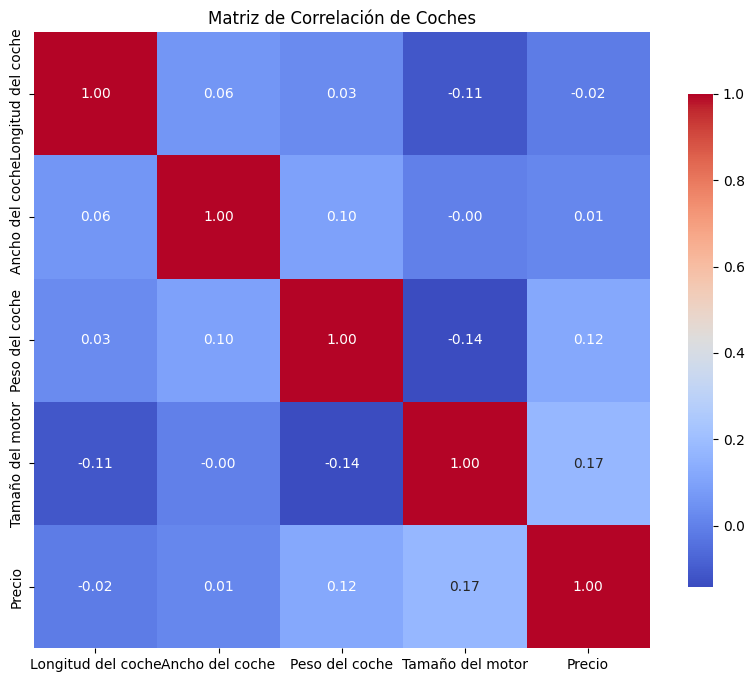

In [65]:
# Generar la matriz de correlación
corr_matrix = numerical_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Mostrar el gráfico
plt.title('Matriz de Correlación de Coches')
plt.show()

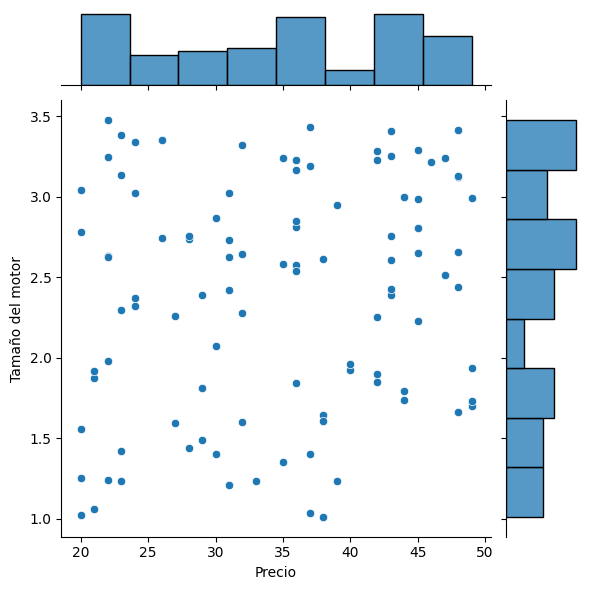

In [53]:
sns.jointplot(x="Precio", y="Tamaño del motor", data=df_coches)

2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función train_test_split de scikit-learn

In [54]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_coches[["Tamaño del motor"]]
y = df_coches["Precio"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(75, 1)


2.3 modelo de regresión lineal
Emplearemos el modelo LinearRegression de scikit-learn para ajustar los datos

In [55]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [3.07257023], el intersecto (A) es 27.260497838073817


2.4 Evaluación del modelo

Text(0.5, 1.0, 'Precio Vs tamaño del motor')

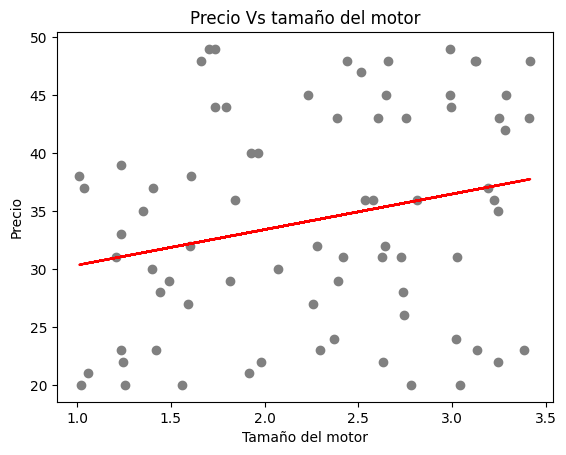

In [66]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Precio')
plt.xlabel('Tamaño del motor')
plt.title('Precio Vs tamaño del motor')

Error medio cuadrático

In [57]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 79.83981759517422
Root Mean Squared Error: 8.935312954517833


In [58]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.660908089515035


R cuadrado

In [59]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: -0.11125703716782209
